In [41]:
import pandas as pd
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.7.0


In [20]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [57]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [34]:
# For each example, the model returns a vector of logits or log-odds scores, one for each class.
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.496925  ,  1.2222241 , -0.6274345 , -0.3506839 , -0.04103285,
         0.18290035, -0.42595625,  0.34417638, -1.4515581 ,  0.17608583]],
      dtype=float32)

In [32]:
# The tf.nn.softmax function converts these logits to probabilities for each class:
tf.nn.softmax(predictions).numpy()

array([[0.05585479, 0.3116574 , 0.04902086, 0.06465054, 0.08811542,
        0.11023127, 0.05996278, 0.12952279, 0.02150149, 0.10948266]],
      dtype=float32)

In [36]:
# Define a loss function for training using losses.SparseCategoricalCrossentropy, 
# which takes a vector of logits and a True index and returns a scalar loss for each example.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# This untrained model gives probabilities close to random (1/10 for each class), 
# so the initial loss should be close to -tf.math.log(1/10) ~= 2.3.
loss_fn(y_train[:1], predictions).numpy()

2.2051744

In [58]:
# Before you start training, configure and compile the model
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [44]:
# train the model
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9789
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0580 - accuracy: 0.9811
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0534 - accuracy: 0.9823
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0483 - accuracy: 0.9841
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0446 - accuracy: 0.9854


In [59]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2971 - accuracy: 0.9149 - val_loss: 0.1429 - val_accuracy: 0.9564
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1431 - accuracy: 0.9580 - val_loss: 0.1071 - val_accuracy: 0.9672
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1064 - accuracy: 0.9675 - val_loss: 0.0875 - val_accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0880 - accuracy: 0.9727 - val_loss: 0.0752 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0747 - accuracy: 0.9764 - val_loss: 0.0718 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0658 - accuracy: 0.9794 - val_loss: 0.0714 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.0703 - val_accuracy:

In [40]:
# If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.45668339e-08, 3.03491698e-09, 5.99182931e-06, 1.16884105e-04,
        3.47164246e-12, 2.06496615e-08, 8.24360450e-14, 9.99875307e-01,
        9.23980451e-07, 8.30630938e-07],
       [1.65891101e-09, 6.56614475e-06, 9.99955654e-01, 3.75263808e-05,
        1.31469691e-16, 2.84651293e-07, 1.17314447e-09, 1.42376328e-11,
        3.80833427e-08, 2.74238938e-13],
       [1.82668558e-07, 9.98677194e-01, 1.30730681e-04, 1.27265394e-05,
        2.12188625e-05, 8.27785552e-05, 1.31787356e-05, 8.49545700e-04,
        2.09220438e-04, 3.19271112e-06],
       [9.99967933e-01, 4.14094930e-12, 1.89237699e-06, 7.26375093e-09,
        1.27115198e-08, 4.33003976e-07, 1.07103569e-05, 1.49999678e-05,
        1.25517796e-09, 3.92042739e-06],
       [5.03283763e-06, 1.62125313e-11, 3.60513786e-06, 7.18313098e-09,
        9.99280393e-01, 3.72111174e-07, 4.76297282e-06, 5.19311470e-05,
        1.19398749e-06, 6.52790652e-04]], dtype=float32)>

C:\Users\eljan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

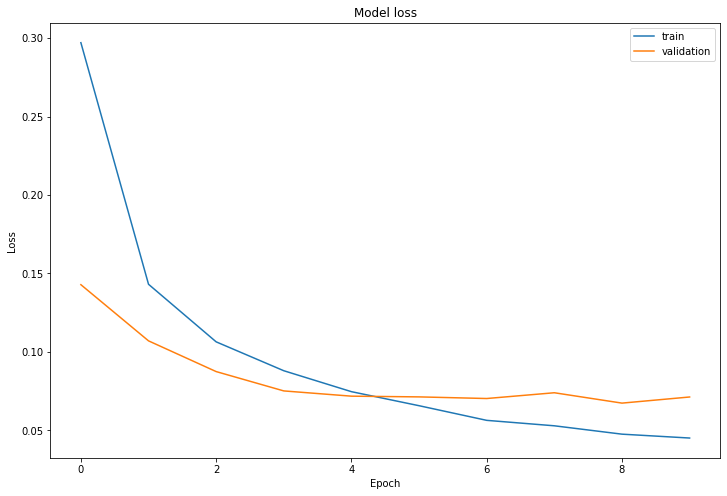

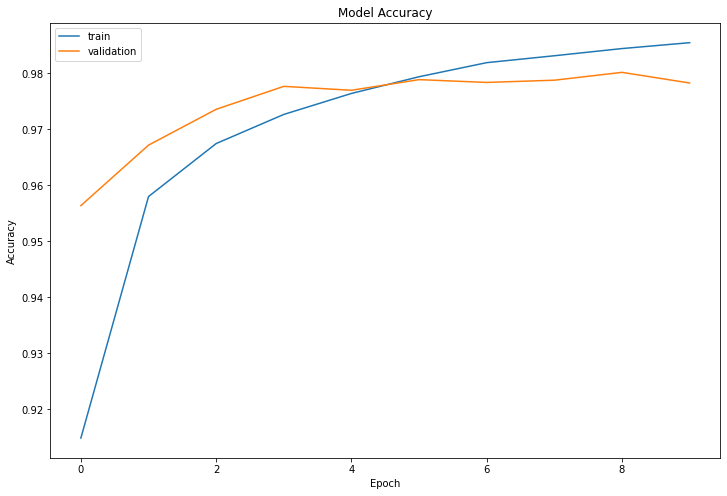

In [62]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on. 
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')